Covariance matrix has negative values!


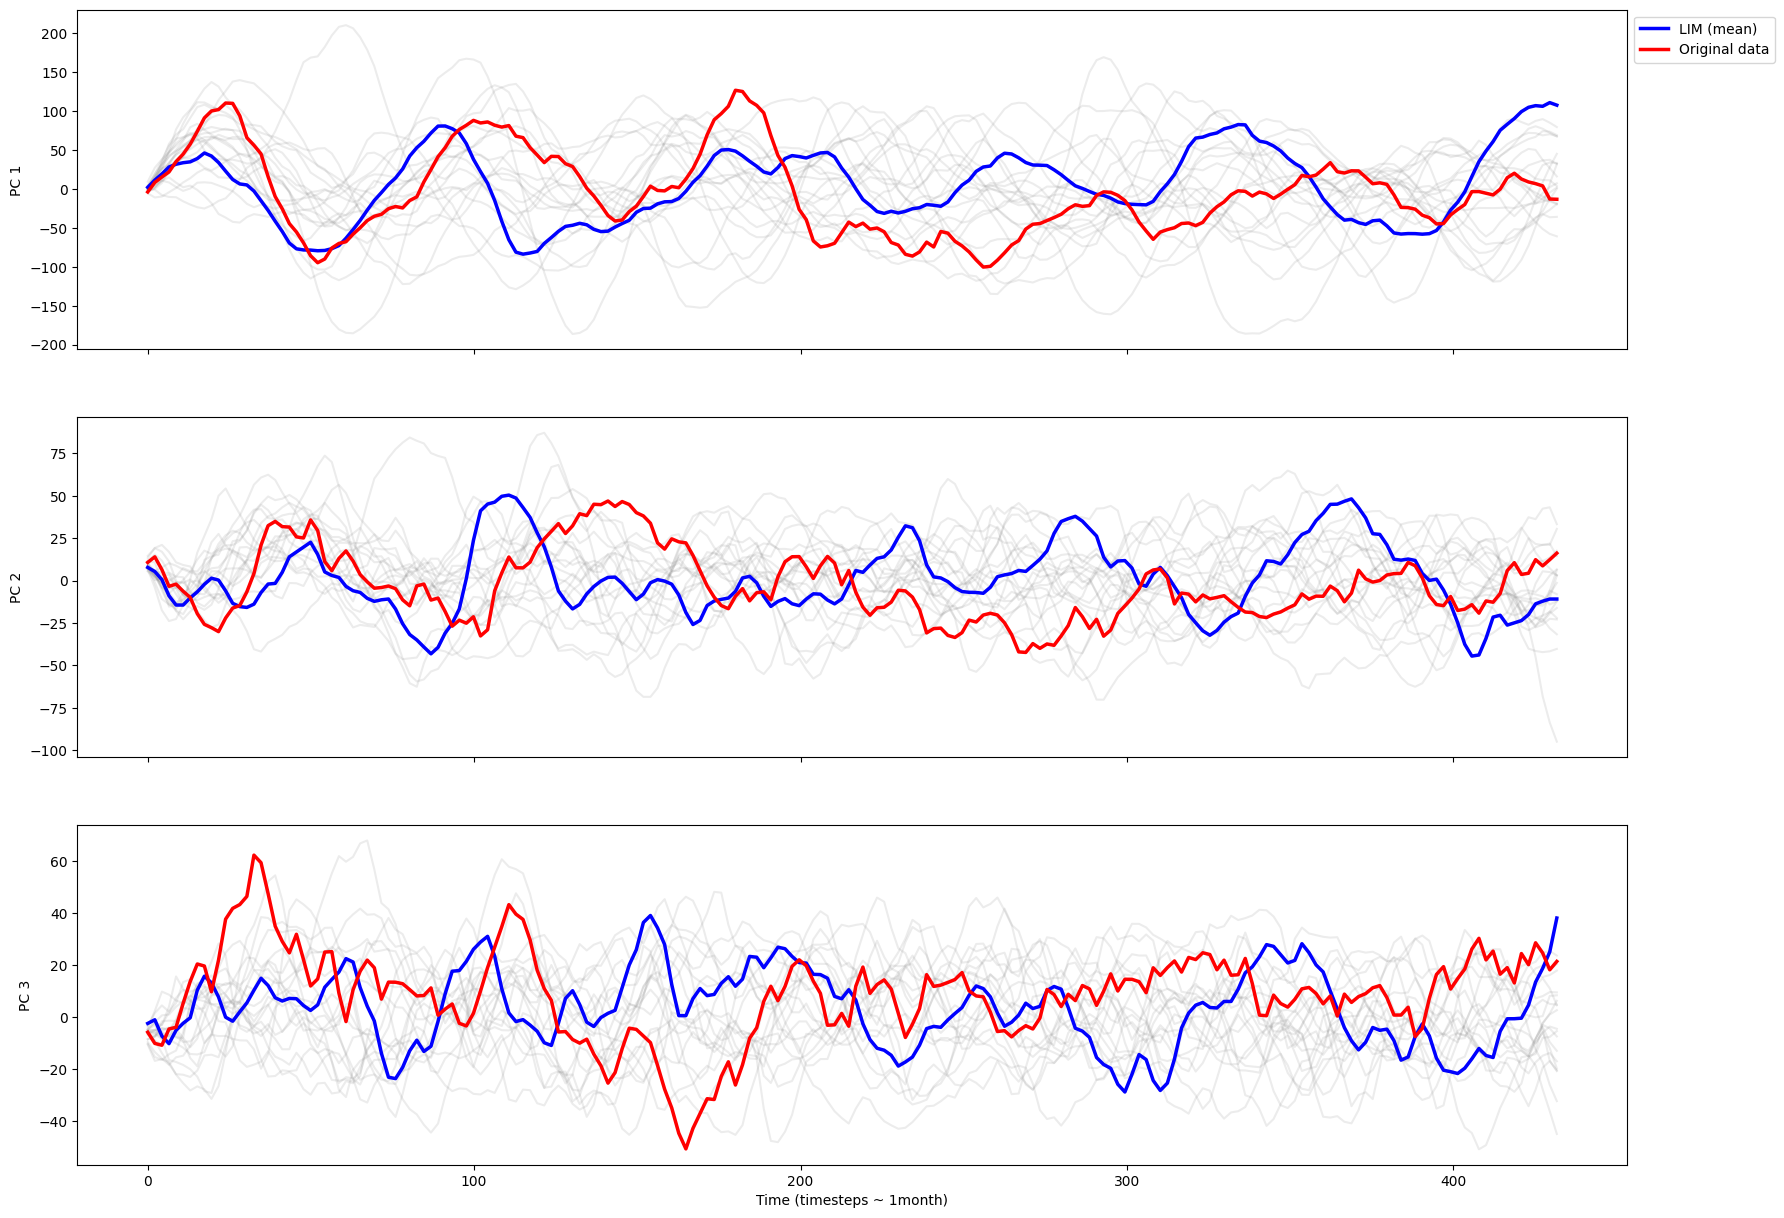

In [1]:
from LIM import LIM_class
from LIM.neural_networks.utilities import *
%load_ext autoreload
%autoreload 2

data = torch.load("./data/data_piControl.pt")
data = data.numpy()

tau = 1
model = LIM_class.LIM(tau)
model.fit(data)

num_timeseries = 20

multiple_timeseries = []

for t in range(num_timeseries):
    # Forecast mean using LIM model
    lim_integration, times = model.noise_integration(data[:, 0], timesteps=200, num_comp=30)
    lim_integration = lim_integration.T
    multiple_timeseries.append(lim_integration)

mean_timeseries = np.mean(multiple_timeseries, axis=0)

# Plot time evolution of selected components
idx_components = [0, 1, 2]
fig, axs = plt.subplots(len(idx_components), figsize=(20, 15), sharex=True)

for i, component in enumerate(idx_components):

    for t in range(num_timeseries):
        #print("multiple_timeseries[t][component, :]: ", multiple_timeseries[t][component, :])
        axs[i].plot(times[:], multiple_timeseries[t][component, :], color='grey', alpha=0.15)

    # Plot forecasted data using LIM model
    axs[i].plot(times[:], lim_integration[component, :], color="blue", label=f'LIM (mean)', linewidth=2.5)
    axs[i].plot(times[:], data[component, :200], color="red", label=f'Original data', linewidth=2.5)

    # Set y-axis label
    axs[i].set_ylabel(f'PC {idx_components[i]+1}')

# Add legend
_ = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Time (timesteps ~ 1month)')
plt.show()